Inteligência Artificial - LAB02

In [29]:
#Execute esta celula
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [45]:
# import as bibliotecas necessárias
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

In [46]:
dataset = sns.load_dataset('breast-cancer');
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   idade        286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   nodes_caps   286 non-null    object
 6   deg_maling   286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [47]:
dataset.columns

Index(['class', 'idade', 'menopause', 'tumor_size', 'inv_nodes', 'nodes_caps', 'deg_maling', 'breast', 'breast_quad', 'irradiat'], dtype='object')

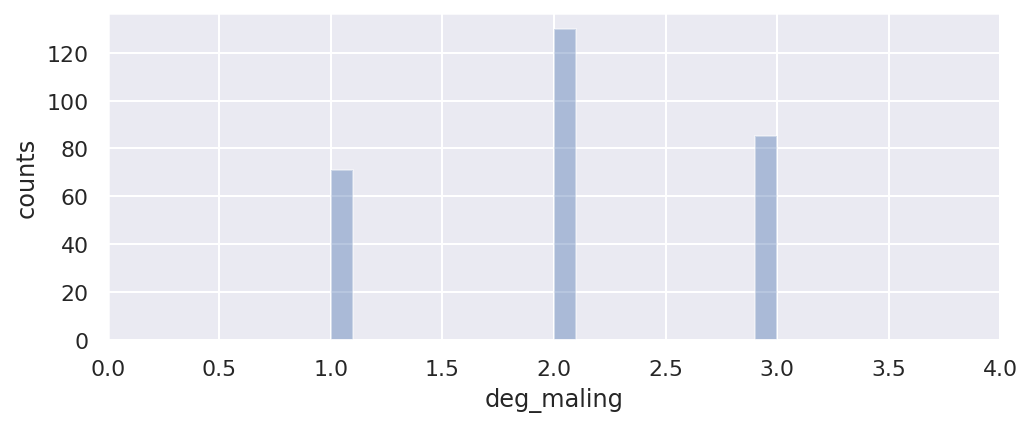

In [48]:
# Qual foi a distribuição de nivel de malignidade dos tumores? 
import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(dataset.deg_maling, kde=False, bins=20)

# bug
#ax = sns.distplot(titanic.age, kde=False, bins=20).set(xlim=(0, 90));

ax.set(xlim=(0, 4));
ax.set_ylabel('counts');

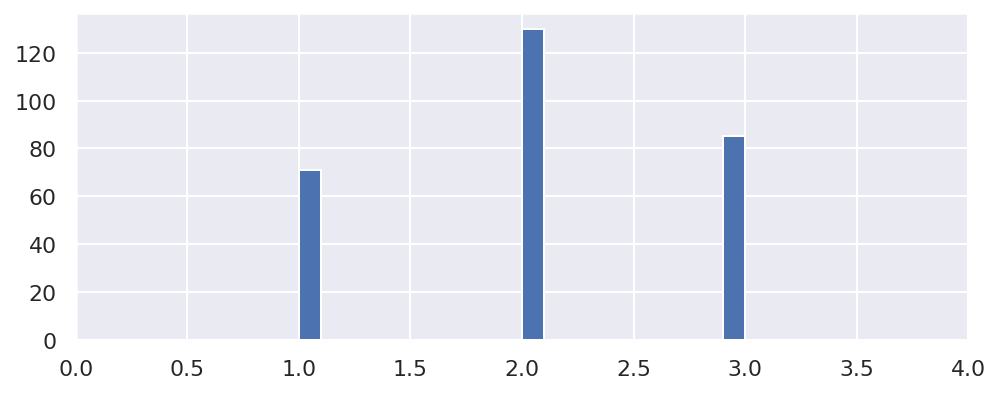

In [50]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(dataset.deg_maling, bins=20);
ax.set_xlim(0,4);

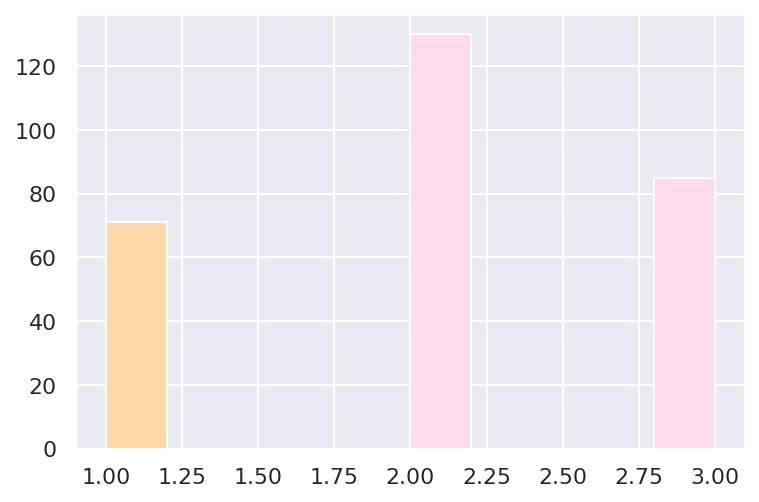

In [58]:
# configure as cores
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# obter o objeto que iremos alterar - patches é uma matriz com len: número de caixas
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(dataset.deg_maling, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins 

ax.grid(True)
fig.show()

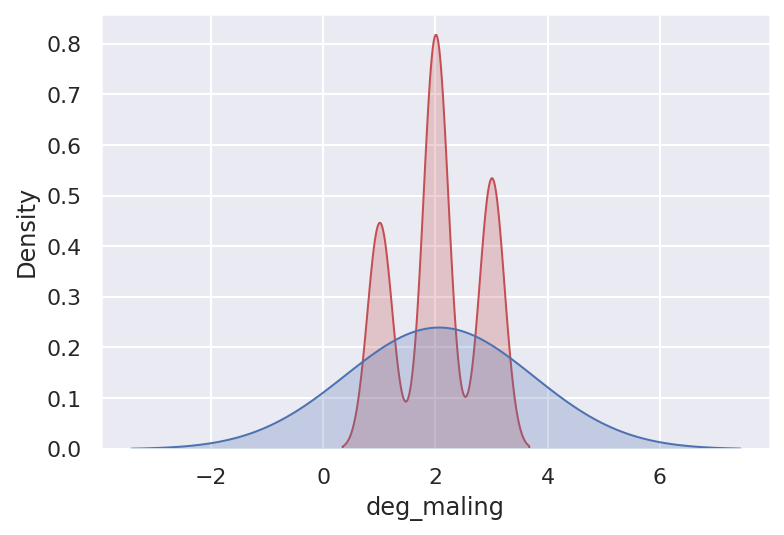

In [60]:
sns.kdeplot(dataset.deg_maling, bw=0.3, label="bw: 0.3", shade=True, color="r");
sns.kdeplot(dataset.deg_maling, bw=2, label="bw: 2", shade=True);

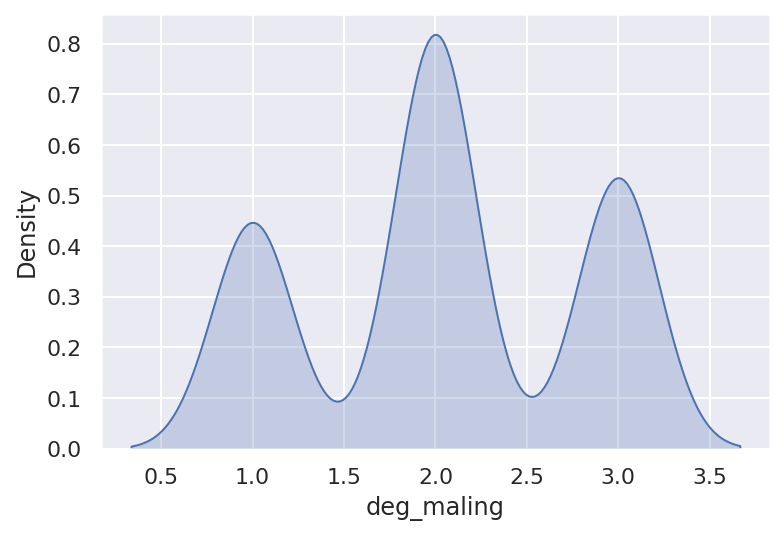

In [61]:
sns.kdeplot(dataset.deg_maling, bw=0.3, label="bw: 0.3", shade=True);

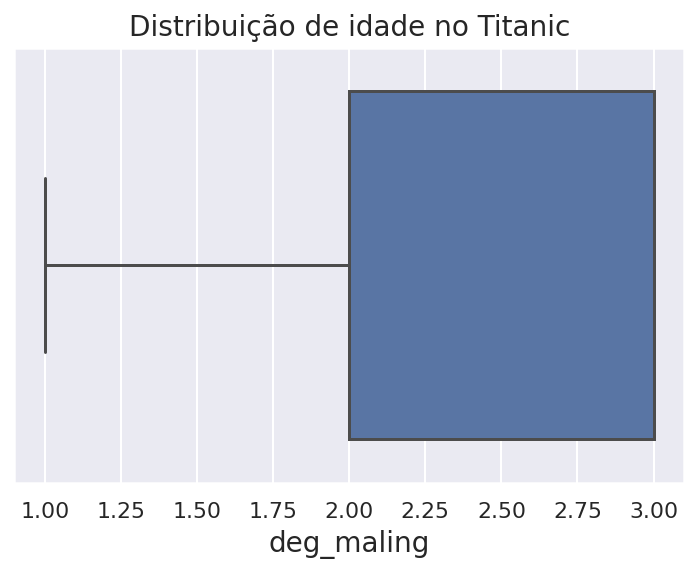

In [62]:
# seaborn
ax = sns.boxplot(x='deg_maling', data = dataset)
#ax = sns.boxplot(x=titanic['age']) # outra forma de codificar
ax.set_ylabel(None);
ax.set_xlabel('deg_maling', fontsize=14);
ax.set_title('Distribuição de idade no Titanic', fontsize=14);

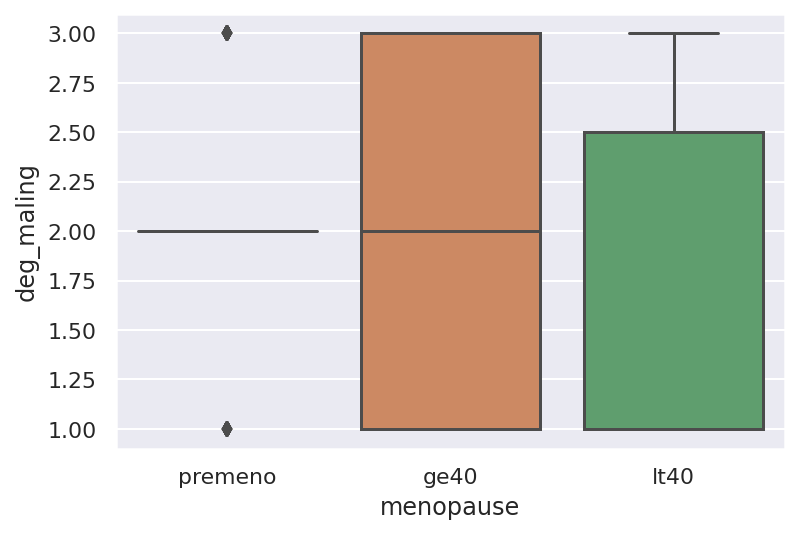

In [64]:
ax = sns.boxplot(x='menopause', y='deg_maling', data=dataset)

In [4]:
print(dataset['deg-maling'].mean())
print(dataset['deg-maling'].median())

2.0489510489510487
2.0


In [5]:
dataset.describe()

,deg-maling
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


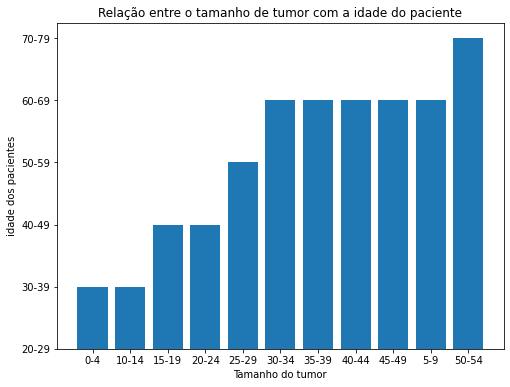

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(tumorsize['tumor-size'],idade['idade'])
plt.xlabel('Tamanho do tumor')
plt.ylabel('idade dos pacientes')
plt.title('Relação entre o tamanho de tumor com a idade do paciente')
plt.savefig('annual-real-gnp-us-1909-to-1970.png')

plt.show()

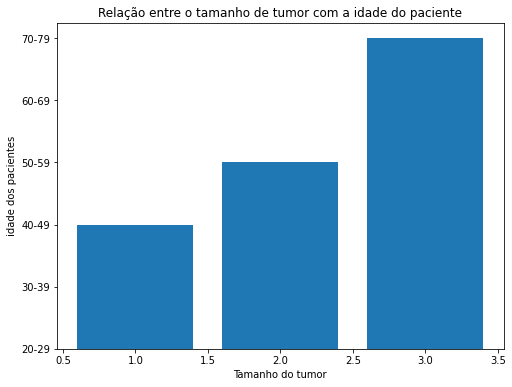

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(degmaling['deg-maling'],idade['idade'])
plt.xlabel('Tamanho do tumor')
plt.ylabel('idade dos pacientes')
plt.title('Relação entre o tamanho de tumor com a idade do paciente')
plt.savefig('annual-real-gnp-us-1909-to-1970.png')

plt.show()